In [100]:
import urllib.request

import pandas as pd 
import plotly.graph_objects as go
from tqdm import tqdm

from IPython.display import Image as IPythonImage, clear_output, display

from PIL import Image, ImageDraw

In [32]:
image_url = "https://media.formula1.com/image/upload/content/dam/fom-website/2018-redesign-assets/Circuit%20maps%2016x9/Netherlands_Circuit.png"
urllib.request.urlretrieve(image_url, "../data/map.png")


('../data/map.png', <http.client.HTTPMessage at 0x1211bf8e0>)

IMAGE SIZE (1920, 1080)


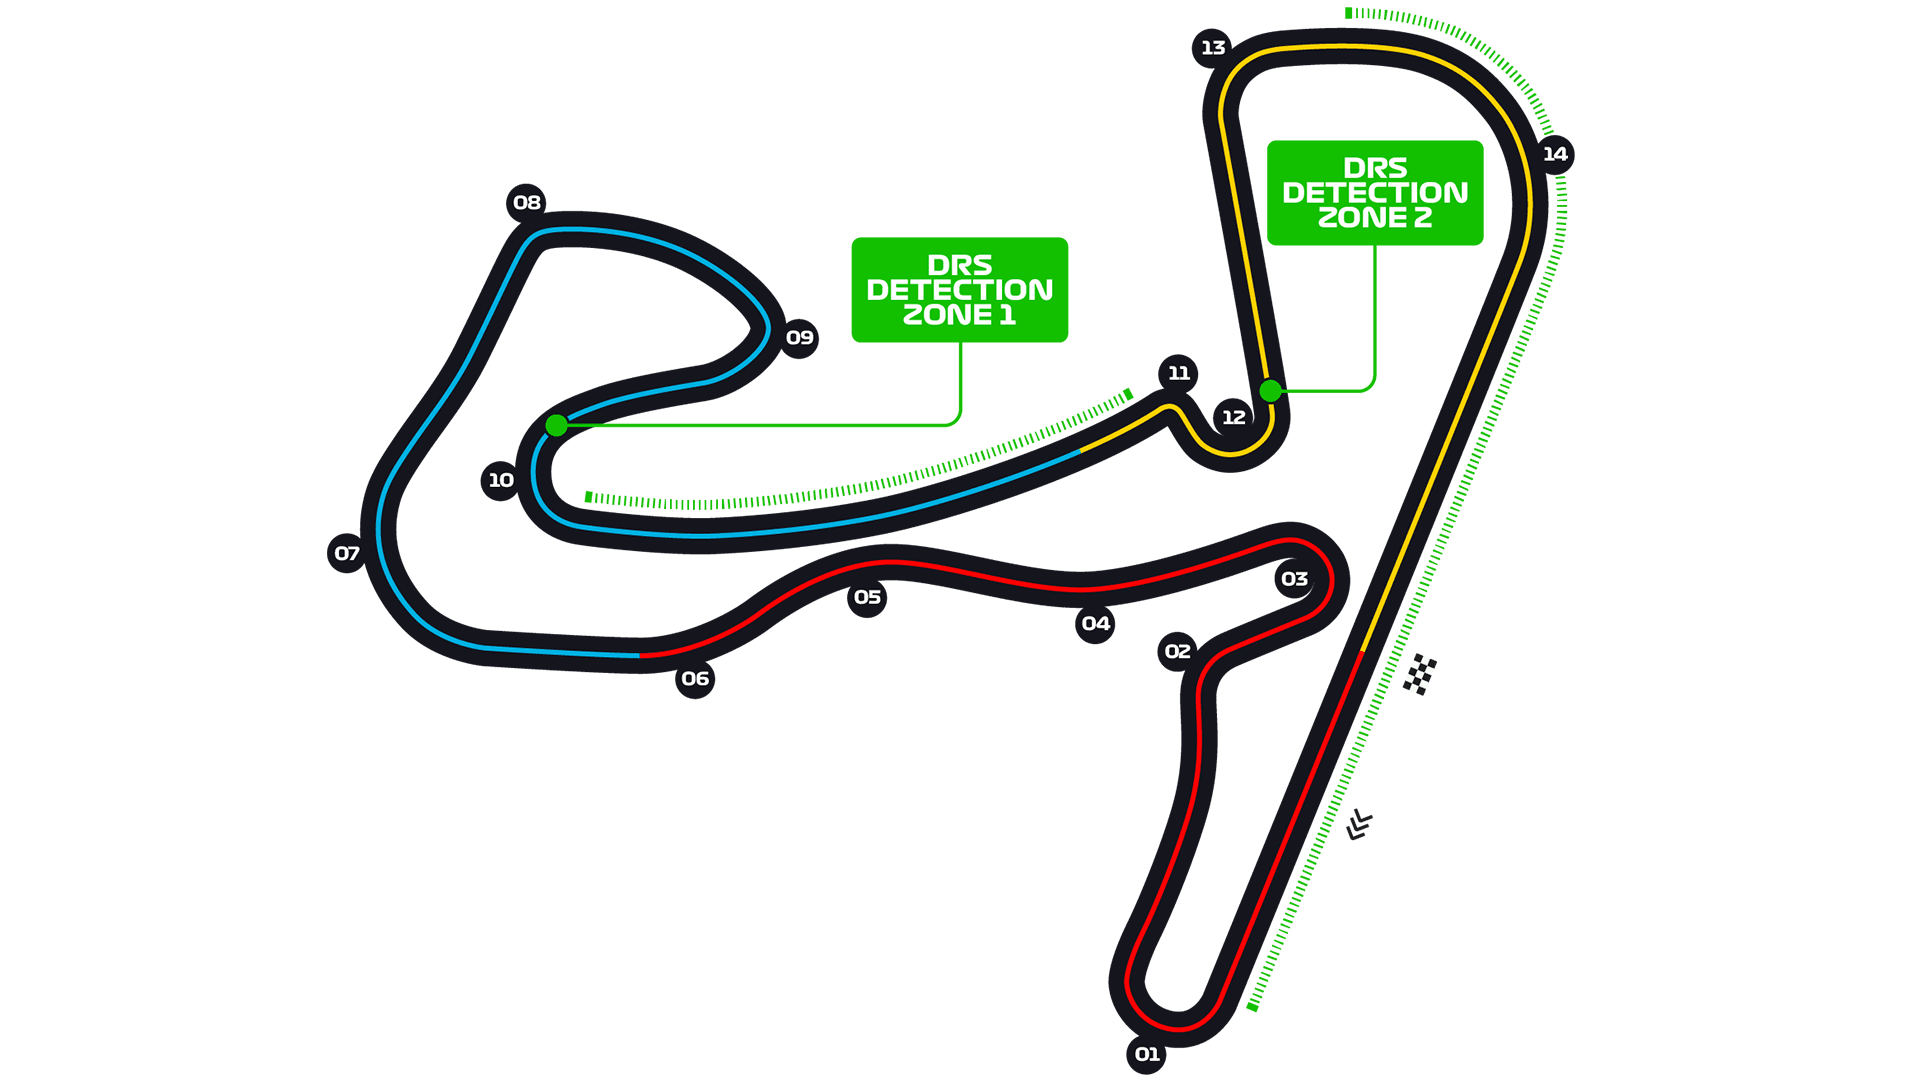

In [68]:
track = Image.open("../data/map.png")
print("IMAGE SIZE", track.size)
track

In [81]:
data = pd.read_csv("../data/combined.csv")

original_fps = 30
target_fps = 3

plot_subset = data[::int(original_fps/target_fps)].copy().reset_index()


In [82]:

min_lat = plot_subset['Lat (Degrees)'].min()
min_lon = plot_subset['Lon (Degrees)'].min()

plot_subset['lat'] = plot_subset['Lat (Degrees)'] - min_lat
plot_subset['lon'] = plot_subset['Lon (Degrees)'] - min_lon

# If you use a different map - adjust these to make the GPS trace more aligned with the track
scaling_lat = 100000 * 1.32
scaling_lon = 100000 * 0.81 * -1

offset_lat = 40
offset_lon = 1540 

marker_size = 4


100%|██████████| 6239/6239 [00:00<00:00, 17074.77it/s]


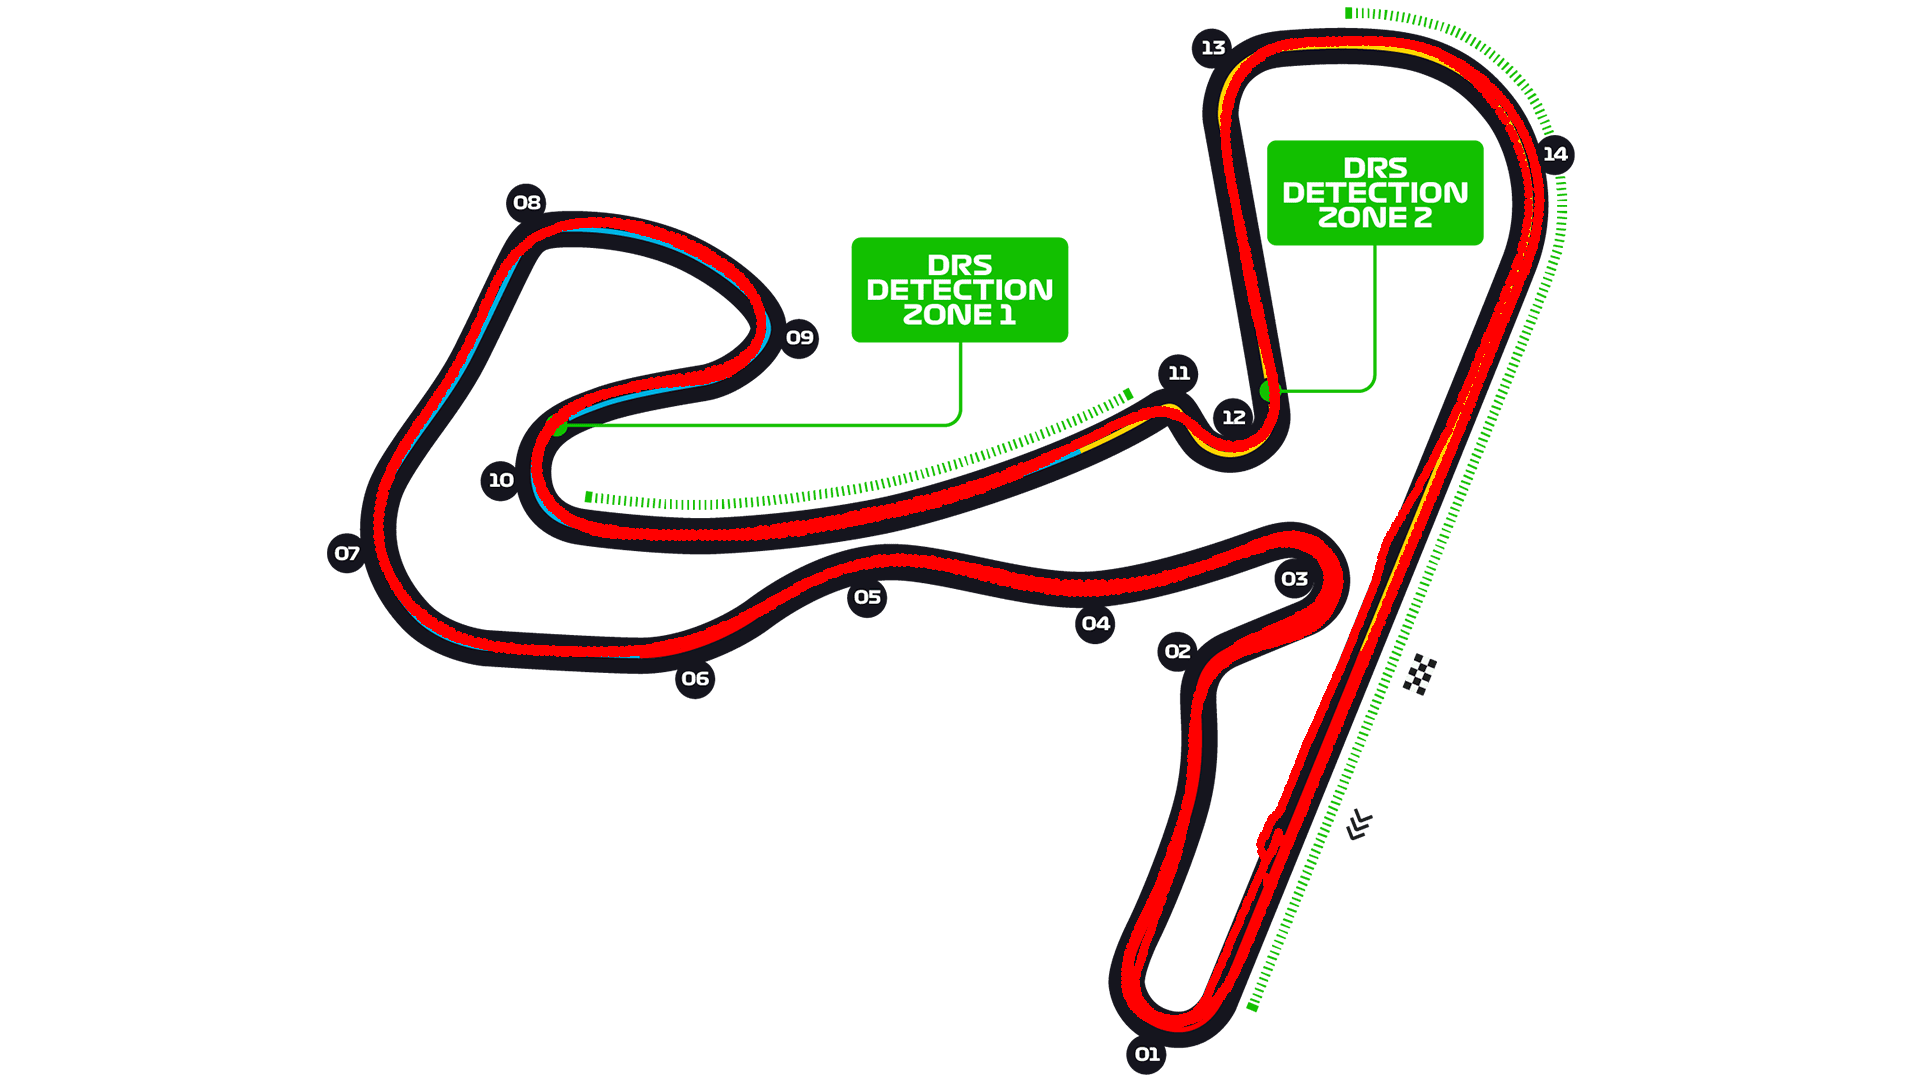

In [83]:
image = track.copy()
draw = ImageDraw.Draw(image)
for row in tqdm(plot_subset.iterrows(), total=plot_subset.shape[0]):
    y = row[1]['lat'] * scaling_lat + offset_lat
    x = row[1]['lon'] * scaling_lon + offset_lon
    draw.ellipse((x-marker_size, y-marker_size, x+marker_size, y+marker_size), fill="red")

image

In [1]:
# Use a slightly larger marker size for the first frame
marker_size = 15

for row in tqdm(plot_subset.iterrows(), total=plot_subset.shape[0]):
    y = row[1]['lat'] * scaling_lat + offset_lat
    x = row[1]['lon'] * scaling_lon + offset_lon

    image = track.copy()
    draw = ImageDraw.Draw(image)
    draw.ellipse((x-marker_size, y-marker_size, x+marker_size, y+marker_size), fill="white", outline="black", width=5)
    image.save(f"../map/gen-{row[0]:05d}.png")
    clear_output(wait=True)
    display(IPythonImage(filename=f"../map/gen-{row[0]:05d}.png"))


NameError: name 'tqdm' is not defined

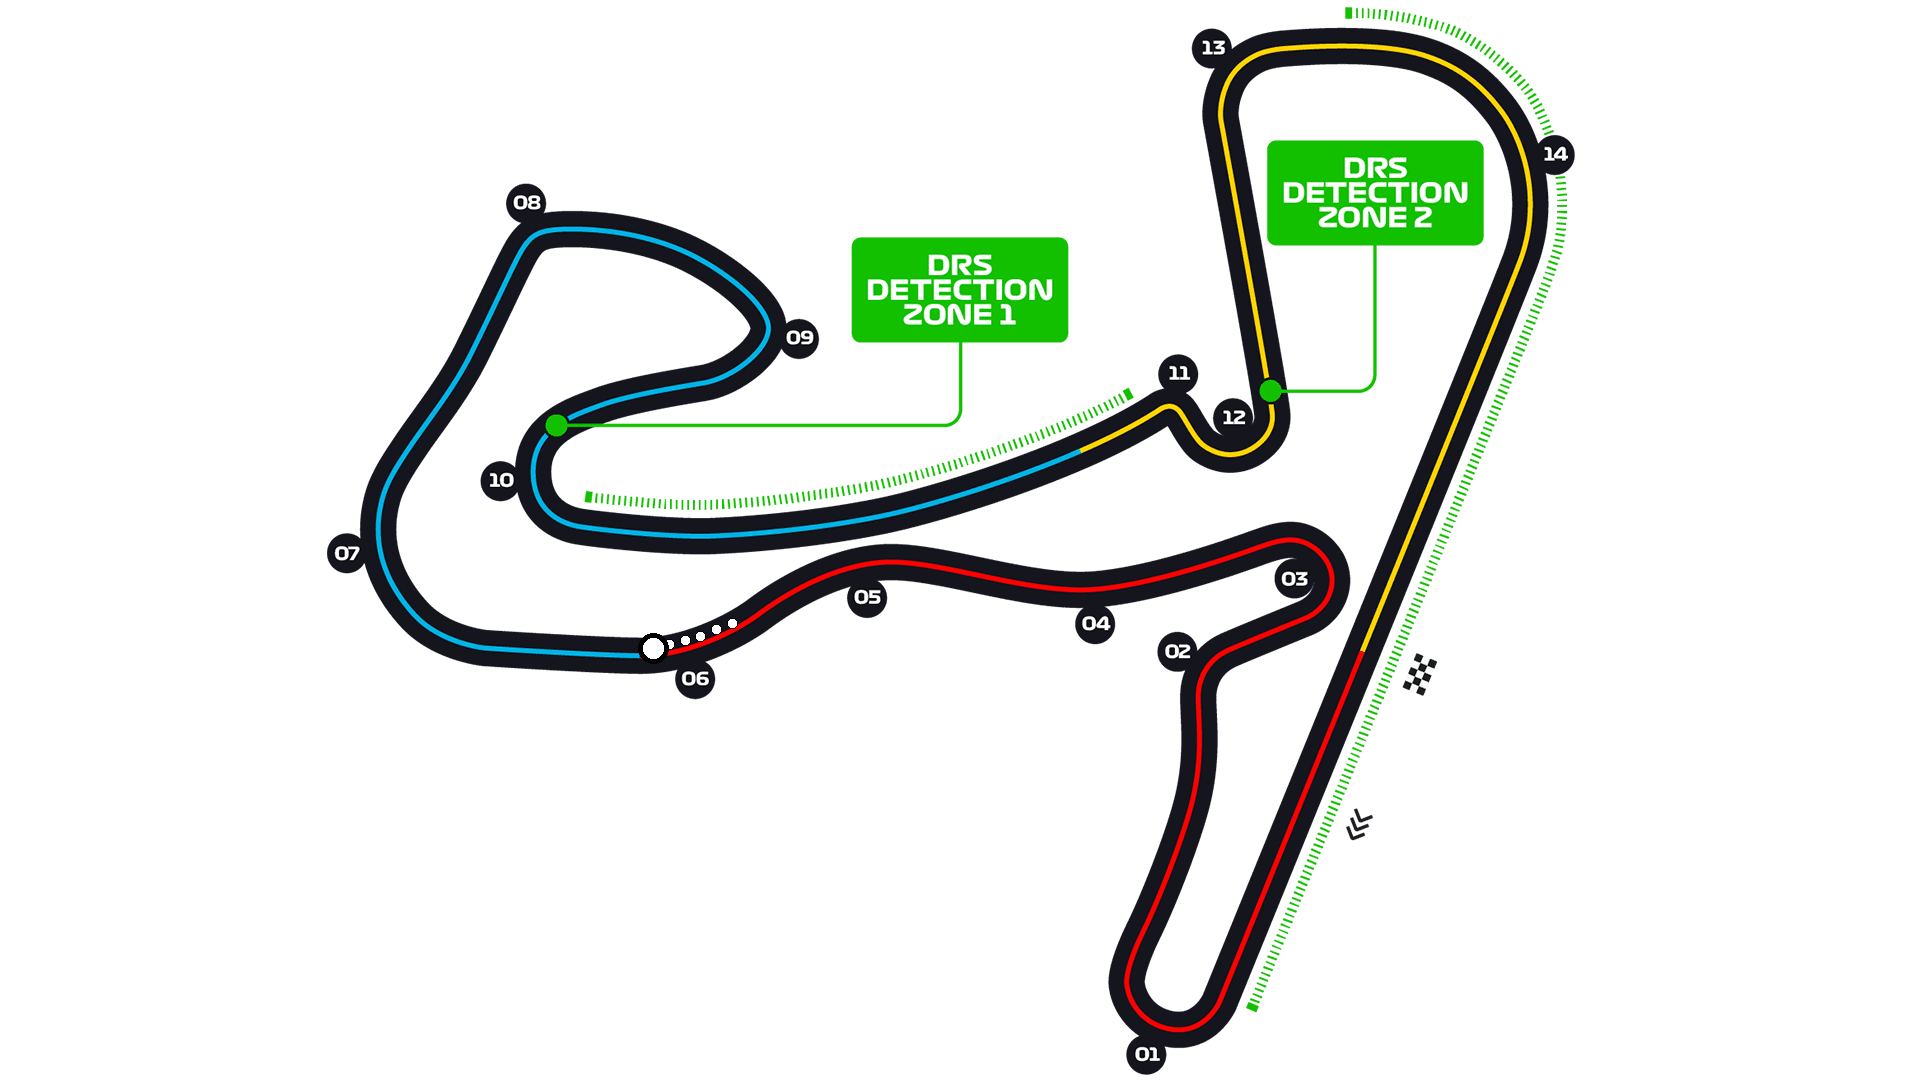

In [109]:
# We can also show "speed" trail
marker_size = 15
speed_marker_size = 5

def get_coordinates(row):
    y = row['lat'] * scaling_lat + offset_lat
    x = row['lon'] * scaling_lon + offset_lon
    return x, y

for row in tqdm(plot_subset.iterrows(), total=plot_subset.shape[0]):
    image = track.copy()
    draw = ImageDraw.Draw(image)


    for hist_ix in range(row[0] - 3, row[0] - 18, -3):
        if hist_ix < 0:
            break
        hist_row = plot_subset.iloc[hist_ix]
        x, y = get_coordinates(hist_row)
        draw.ellipse((x-speed_marker_size, y-speed_marker_size, x+speed_marker_size, y+speed_marker_size), fill="white", outline="black", width=1)

    x, y = get_coordinates(row[1])
    draw.ellipse((x-marker_size, y-marker_size, x+marker_size, y+marker_size), fill="white", outline="black", width=5)

    image.save(f"../map/gen-{row[0]:05d}.png")
    clear_output(wait=True)
    display(IPythonImage(filename=f"../map/gen-{row[0]:05d}.png"))
